In [262]:
import pandas as pd


In [263]:
df=pd.read_csv("/Users/dwiti/Downloads/archive (2)/customer_churn_data.csv")

This steps are for analysing condition of data and make initial cleaning steps

In [264]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [266]:
df.isna().sum().sum()


297

fill null with blanks without dropping rows 

In [267]:
df["InternetService"]= df["InternetService"].fillna("")

In [268]:
df.isna().sum().sum()

0

In [269]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [270]:
df.duplicated().sum()

0

In [271]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


Check the corelation 

In [272]:
numeric_columns_data=df.select_dtypes(include=["number"])

In [273]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


Group by and data vis

In [274]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [275]:
import matplotlib.pyplot as plt

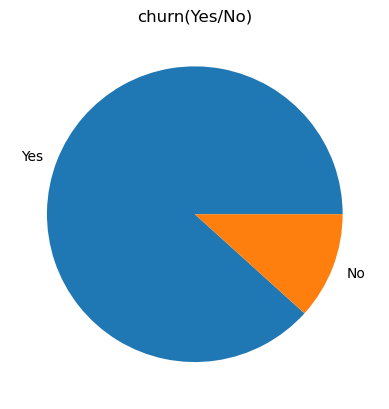

In [276]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("churn(Yes/No)")
plt.ylabel("")
plt.show()

In [277]:
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [278]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

df.groupby("Churn")["Tenure"].mean()

In [279]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

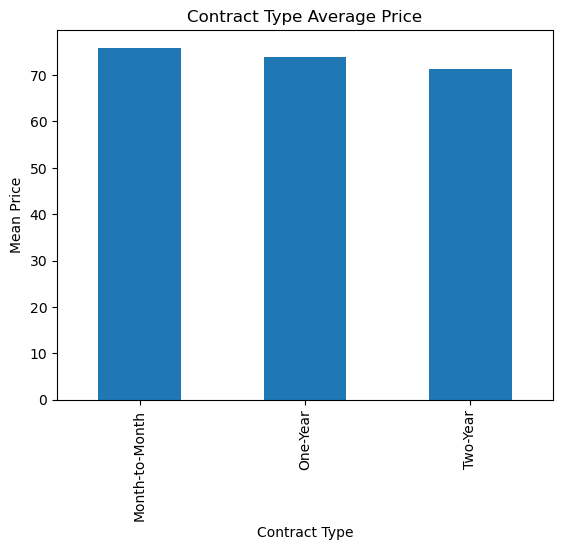

In [280]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

At the lower terms we can see that the monthly charge average decreases 

<function matplotlib.pyplot.show(close=None, block=None)>

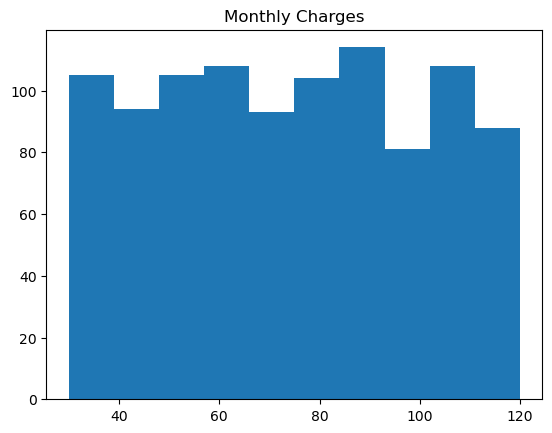

In [281]:
plt.hist(df["MonthlyCharges"])
plt.title("Monthly Charges")
plt.show

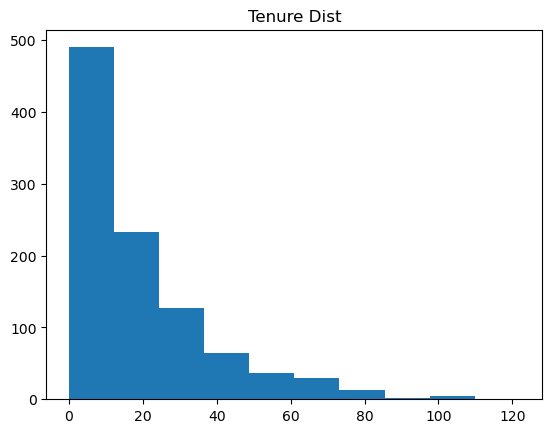

In [282]:
plt.hist(df["Tenure"])
plt.title ("Tenure Dist")
plt.show()

Feature Eng


In [283]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [284]:
Y=df[["Churn"]]
X=df[["Age","Gender","Tenure","MonthlyCharges"]]


In [285]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [286]:
Y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [287]:
import warnings
warnings.filterwarnings('ignore')

x 1 for Female 0 for male


In [288]:
X["Gender"]=X["Gender"].apply(lambda x:1 if x=="Female" else 0)

In [289]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [290]:
Y["Churn"]=Y["Churn"].apply(lambda x:1 if x=="Yes" else 0) 

In [291]:
Y


,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


Training the model

In [292]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
scaler=StandardScaler()

In [295]:
x_train=scaler.fit_transform(x_train)

In [296]:
import joblib
joblib.dump(scaler,"scaler.pkt")

['scaler.pkt']

In [297]:
x_test=scaler.fit_transform(x_test)

In [298]:
x_train

array([[ 1.27411329, -1.0862028 ,  0.42776044, -1.07352032],
       [-0.79551236, -1.0862028 , -0.79479191,  0.29244005],
       [ 0.0323379 ,  0.9206384 , -0.68848301,  1.21687394],
       ...,
       [-0.07114338,  0.9206384 ,  0.58722379, -0.06944771],
       [-1.7268439 ,  0.9206384 ,  0.69353269,  0.39628271],
       [ 0.13581918,  0.9206384 ,  0.32145154,  0.69766065]])

In [299]:
x_test

array([[-2.54530209e-01,  9.51189731e-01,  2.13695652e+00,
        -3.29876159e-01],
       [ 7.16959138e-01,  9.51189731e-01, -4.20397722e-01,
        -7.44304553e-01],
       [ 6.19810203e-01,  9.51189731e-01,  1.04094756e+00,
         1.27170889e+00],
       [-5.45977013e-01,  9.51189731e-01,  2.58084014e-01,
        -1.56585694e+00],
       [-6.43125947e-01, -1.05131497e+00, -2.87049965e-03,
        -5.55159126e-01],
       [ 3.69165952e-02, -1.05131497e+00, -9.42306750e-01,
         3.18677366e-01],
       [-1.03172169e+00,  9.51189731e-01, -1.07252305e-01,
        -8.57330478e-01],
       [-1.12887062e+00, -1.05131497e+00,  1.82381110e+00,
        -9.31912211e-01],
       [-2.54530209e-01, -1.05131497e+00, -5.50614025e-02,
         1.36628161e+00],
       [ 6.19810203e-01, -1.05131497e+00, -7.33543139e-01,
         5.90862248e-01],
       [-8.37423817e-01, -1.05131497e+00, -9.94497653e-01,
         5.69717942e-01],
       [-1.51746636e+00, -1.05131497e+00,  1.53702209e-01,
      

In [343]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print("Accuracy score on model is {:1f}".format(accuracy_score(y_test,prediction)))

In [301]:
from sklearn.model_selection import GridSearchCV

In [302]:
from sklearn.linear_model import LogisticRegression

In [303]:
log_model=LogisticRegression()

In [304]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [305]:
log_model.predict([[40,0,20,80]])[0]

1

In [341]:
y_pred=log_model.predict(x_test)

In [344]:
modelperformance(y_pred)

Accuracy score on model is 0.910000


In [308]:
from sklearn.neighbors import KNeighborsClassifier

In [309]:
param_grid={"n_neighbors":[3,5,7,9],
           "weights":["uniform","distance"],}

In [310]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [311]:
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [312]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [313]:
y_pred=gridkn.predict(x_test)

In [314]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [315]:
from sklearn.svm import SVC

In [316]:
svm=SVC()

In [317]:
param_grid={
    "C":[0.01,0.1,0.5,1],
    "kernel":["linear","rbf","poly"]
}

In [318]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)


In [319]:
gridsvc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [320]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [321]:
y_pred=gridsvc.predict(x_test)

In [322]:
modelperformance(y_pred)

Accuracy score on model is 0.915


In [323]:
from sklearn.tree import DecisionTreeClassifier

In [324]:
param_grid={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [325]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [326]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [327]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [328]:
y_pred=grid_tree.predict(x_test)

In [329]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [330]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [331]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [332]:
param_grid={
    "n_estimators":[32,64,128,256],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}

In [333]:
grid_rfc=GridSearchCV(rfc_model,param_grid,cv=5)

In [334]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [335]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [336]:
y_predict=grid_rfc.predict(x_test)

In [337]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [338]:
best_model=gridsvc.best_estimator_

In [339]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [345]:
y_proba = log_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

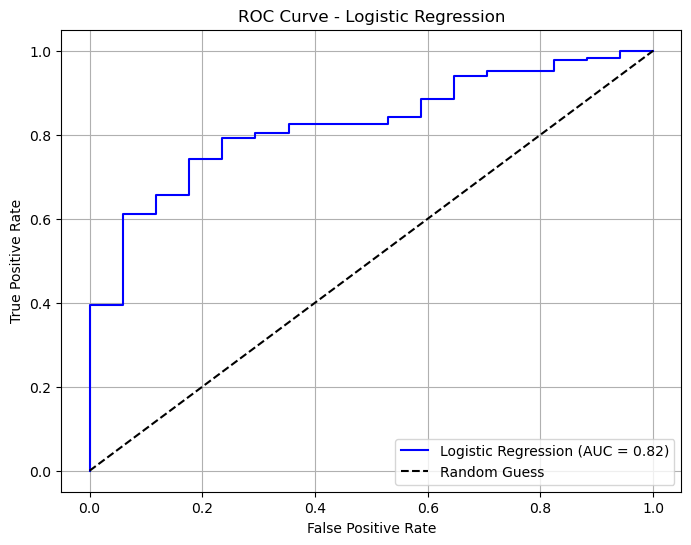

In [346]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()